In [ ]:
#WEATHER API PROJECT – SOUTHEAST U.S. CITIES

In [ ]:
#Libraries

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import datetime

In [6]:
import os

In [ ]:
#I want to use my API key without putting it directly in the code 
#The key goes into a .env file saved locally. 
#The.gitignore file in the project folder tells git not to upload the .env file

In [ ]:
#Package to read the .env file

In [8]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [9]:
from dotenv import load_dotenv

In [ ]:
#Load the .env file

In [10]:
load_dotenv()

True

In [55]:
#Get the API key from the .env file
API_KEY = os.getenv("OPENWEATHER_API_KEY")
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

In [56]:
#List of cities
cities = ["Atlanta", "Miami", "Orlando", "Tampa", "Charlotte", "Nashville", "New Orleans"]

In [57]:
#Storage for weather data
weather_data = []

In [58]:
#Fetch weather data for each city
for city in cities:
    params = {
        "q": city,              
        "appid": API_KEY,       
        "units": "imperial"       
    }

    response = requests.get(BASE_URL, params=params)  

    description = data["weather"][0]["description"]
    
    if response.status_code == 200:                  
        data = response.json()  
        
        city_weather = {                            
            "city": city,
            "temperature": data["main"]["temp"], 
            "humidity": data["main"]["humidity"],    
            "wind_speed": data["wind"]["speed"],     
            "description": data["weather"][0]["description"],
            "date": datetime.date.today()          
        }
        
        weather_data.append(city_weather)   
        
    else:
        print(f"Failed to get data for {city}")

In [59]:
df = pd.DataFrame(weather_data)

In [60]:
display(df)

,city,temperature,humidity,wind_speed,description,date
0,Atlanta,82.72,51,8.05,few clouds,2025-08-29
1,Miami,91.13,67,9.22,broken clouds,2025-08-29
2,Orlando,90.21,67,5.75,broken clouds,2025-08-29
3,Tampa,89.89,66,12.66,broken clouds,2025-08-29
4,Charlotte,83.30,42,4.61,few clouds,2025-08-29
5,Nashville,86.04,36,8.05,scattered clouds,2025-08-29
6,New Orleans,82.83,71,3.44,scattered clouds,2025-08-29


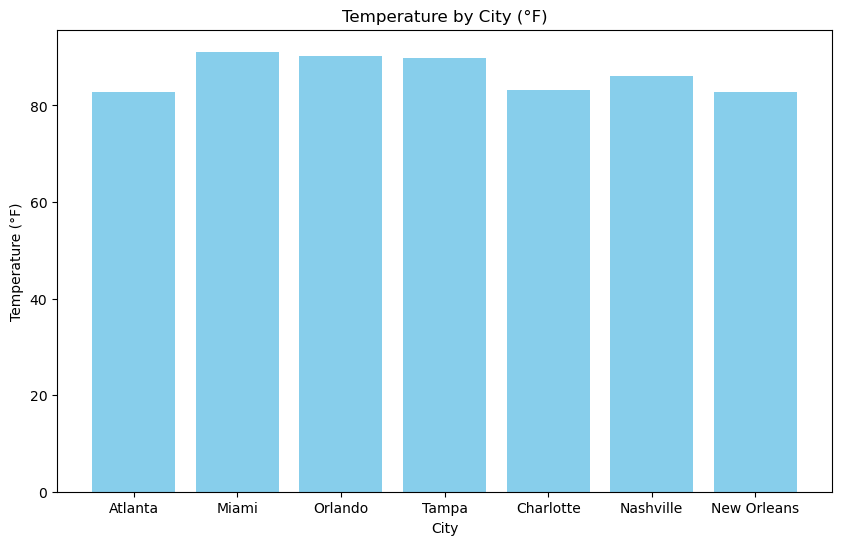

In [61]:
#Temperature comparison
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['temperature'], color='skyblue')
plt.title("Temperature by City (°F)")
plt.xlabel("City")
plt.ylabel("Temperature (°F)")
plt.show()


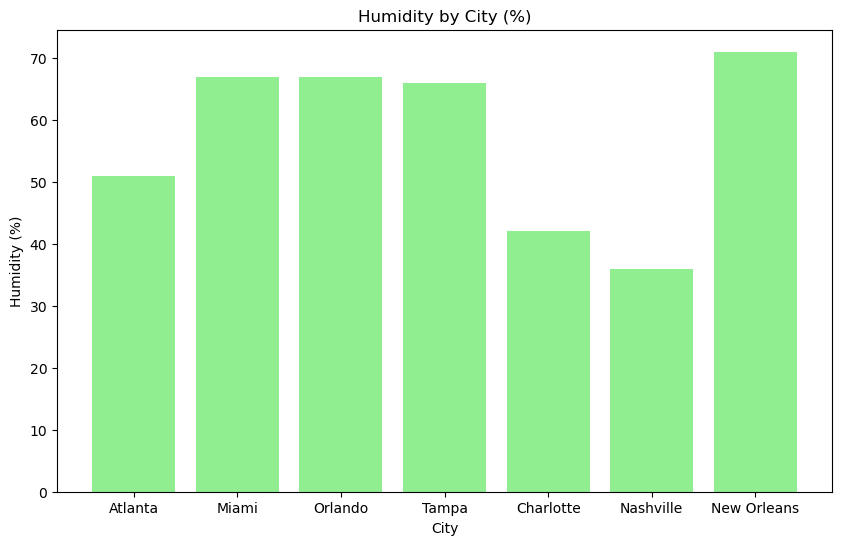

In [62]:
#Humidity comparison
plt.figure(figsize=(10,6))
plt.bar(df['city'], df['humidity'], color='lightgreen')
plt.title("Humidity by City (%)")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.show()


In [64]:
#Save the data in a CSV file 
file_path = "data/weather_data.csv"
os.makedirs("data", exist_ok=True)
df.to_csv(file_path, index=False)